## Final Project Submission

Please fill out:
* Student name: Bidur Sundar Shrestha
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Hardik Idnani
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [2]:
#Importing the given data set 
df= pd.read_csv('Data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#Display some sample statistics and looking for outliers 

desc_df = df.describe()

#add std metric at the bottom to look for outliers that 3 stds away from the mean
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
+3_std,1.321068e+10,1.642401e+06,6.152097,4.422779,4834.640225,1.393373e+05,3.113145,0.268070,2.530921,5.361462,11.177514,4271.876126,2059.125378,1283.476020,98238.491062,47.975748,-121.791812,4042.311733,94581.609363
-3_std,-4.049733e+09,-5.618078e+05,0.594303,-0.191127,-673.996525,-1.091385e+05,-0.124952,-0.252879,-2.063196,1.458189,4.138316,-694.682441,1882.873973,-1116.202463,97917.412628,47.144438,-122.636153,-69.071098,-69065.042340


In [6]:
#looking for null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#Calculating percentage of missing values in each column
missing_percentage = df.isnull().mean() *100
#print the result
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64


In [8]:
#Replacing null values and "nan" with 0

df = df.replace("nan","0")

col = ['waterfront', 'view', 'yr_renovated']

for name in col:
    df[name] = df[name].fillna(value=0)

In [9]:
#Double checking for missing values in each column
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
#Checking for duplicates if any duplicate rows in our dataset
df_duplicates = df[df.duplicated()]
print(len(df_duplicates))
display(df_duplicates)

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [11]:
#Checking for duplicated IDs 
duplicated_ids = df.duplicated(subset=['id'], keep=False)
duplicated_ids.value_counts()

False    21244
True       353
dtype: int64

In [12]:
#Exploring duplicated IDs
df_duplicated_ids = df[duplicated_ids]
df_duplicated_ids.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460


In [13]:
#Droping the duplicates and keep the latest sale of each property
df.drop_duplicates(subset=['id'], keep='last', inplace=True)
print(df.shape)

(21420, 21)


In [14]:
#Turning the sqft column into a numeric column

df.sqft_basement = df.sqft_basement.str.replace("?",'0.0')
df.sqft_basement = pd.to_numeric(df['sqft_basement'])

In [15]:
#double checkinf data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  float64
 9   view           21420 non-null  float64
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  float64
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

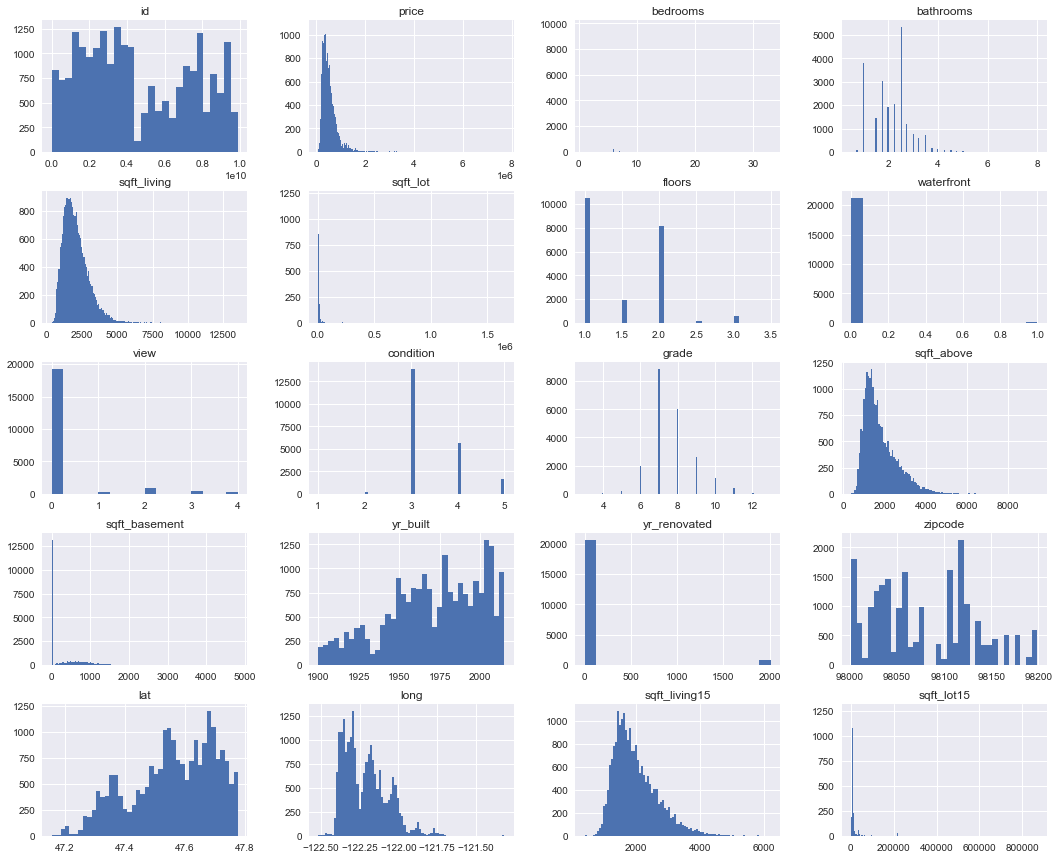

In [16]:
#First, let's plot a histogram for each column
# checking the distribution of variables
df.hist(figsize=(18,15), bins='auto');


In [ ]:
# Varibales such as bathrooms, bedrooms, condition, floors, grade, view, waterfront, and yr_renovated are categorical. 
#The remaining variables seem to be continuous.

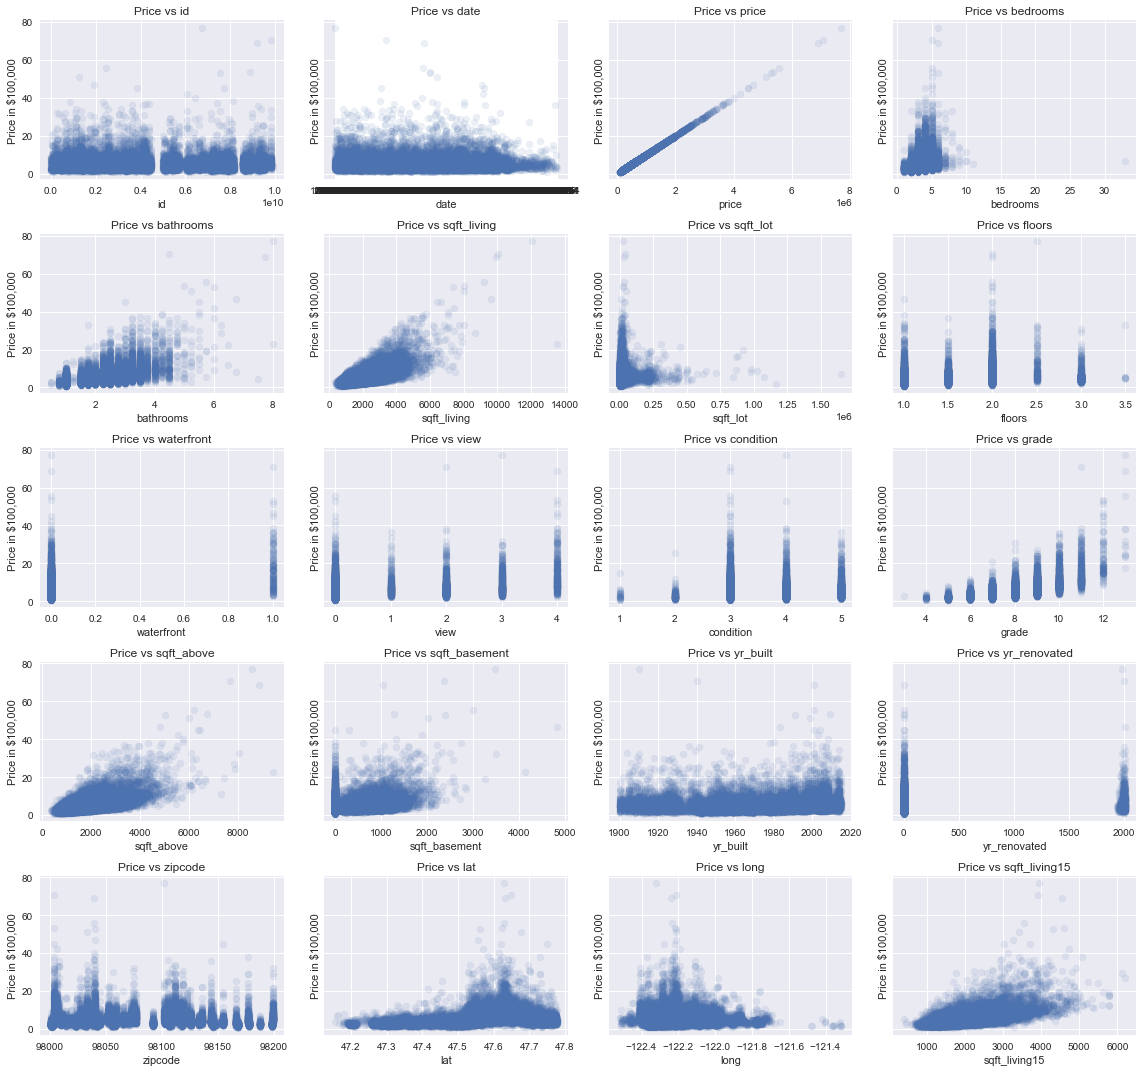

In [17]:
# let's plot scatter plots that will further help us identify outliers and categorical variables 
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

In [ ]:
#These scatter plots helped to confirm which variables are categorical and which are continuous. 
#We have identified our continuous variables, sqft_living, sqft_lot, 
#sqft_above, sqft_basement, yr_built, sqft_living15 and sqft_lot15, and 
#later we will look to transform some of these variables, 
#since many of them currently do not appear to follow a normal distribution.

In [18]:
#checking the correlation between dependent variable and independent variables
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.018450,0.000691,0.004343,-0.013451,-0.132648,0.018139,-0.003628,0.011109,-0.024300,0.006470,-0.011794,-0.004863,0.021171,-0.010857,-0.007934,-0.002766,0.019336,-0.003883,-0.139429
price,-0.018450,1.000000,0.309640,0.525215,0.701295,0.088789,0.254972,0.264915,0.392787,0.034219,0.666835,0.604424,0.321264,0.051012,0.118278,-0.051169,0.306439,0.019826,0.583792,0.082045
bedrooms,0.000691,0.309640,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002205,0.078353,0.025893,0.357988,0.480242,0.297093,0.155241,0.017470,-0.155061,-0.011266,0.132439,0.394949,0.030570
bathrooms,0.004343,0.525215,0.515383,1.000000,0.755522,0.087779,0.501803,0.063635,0.184949,-0.129362,0.665587,0.686328,0.278140,0.506252,0.047686,-0.203884,0.023143,0.223808,0.569453,0.087760
sqft_living,-0.013451,0.701295,0.579069,0.755522,1.000000,0.172586,0.352868,0.104737,0.280839,-0.061677,0.762477,0.876533,0.427998,0.316646,0.050851,-0.198995,0.050739,0.240212,0.756186,0.183837
sqft_lot,-0.132648,0.088789,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021429,0.075360,-0.009169,0.113656,0.183210,0.014839,0.052312,0.004991,-0.129422,-0.085822,0.230265,0.143805,0.717743
floors,0.018139,0.254972,0.177734,0.501803,0.352868,-0.005561,1.000000,0.020578,0.027175,-0.266859,0.458091,0.522751,-0.242151,0.488935,0.003141,-0.058532,0.048900,0.124812,0.279071,-0.011367
waterfront,-0.003628,0.264915,-0.002205,0.063635,0.104737,0.021429,0.020578,1.000000,0.381654,0.016608,0.082905,0.071737,0.083317,-0.024842,0.074096,0.029183,-0.012267,-0.037883,0.083921,0.030653
view,0.011109,0.392787,0.078353,0.184949,0.280839,0.075360,0.027175,0.381654,1.000000,0.044678,0.247632,0.165289,0.270104,-0.056171,0.089982,0.087334,0.005835,-0.079019,0.277555,0.073381
condition,-0.024300,0.034219,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.016608,0.044678,1.000000,-0.150508,-0.161483,0.168991,-0.365129,-0.056264,0.004372,-0.015566,-0.107154,-0.095256,-0.003450


In [19]:
#Looking at which features are highly correlated with our y-variable, price.
df.corr()[abs(df.corr()['price']) > 0.3]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,-0.018450,1.000000,0.309640,0.525215,0.701295,0.088789,0.254972,0.264915,0.392787,0.034219,0.666835,0.604424,0.321264,0.051012,0.118278,-0.051169,0.306439,0.019826,0.583792,0.082045
bedrooms,0.000691,0.309640,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002205,0.078353,0.025893,0.357988,0.480242,0.297093,0.155241,0.017470,-0.155061,-0.011266,0.132439,0.394949,0.030570
bathrooms,0.004343,0.525215,0.515383,1.000000,0.755522,0.087779,0.501803,0.063635,0.184949,-0.129362,0.665587,0.686328,0.278140,0.506252,0.047686,-0.203884,0.023143,0.223808,0.569453,0.087760
sqft_living,-0.013451,0.701295,0.579069,0.755522,1.000000,0.172586,0.352868,0.104737,0.280839,-0.061677,0.762477,0.876533,0.427998,0.316646,0.050851,-0.198995,0.050739,0.240212,0.756186,0.183837
view,0.011109,0.392787,0.078353,0.184949,0.280839,0.075360,0.027175,0.381654,1.000000,0.044678,0.247632,0.165289,0.270104,-0.056171,0.089982,0.087334,0.005835,-0.079019,0.277555,0.073381
grade,0.006470,0.666835,0.357988,0.665587,0.762477,0.113656,0.458091,0.082905,0.247632,-0.150508,1.000000,0.756221,0.164458,0.446235,0.015744,-0.183588,0.112815,0.198555,0.713178,0.120056
sqft_above,-0.011794,0.604424,0.480242,0.686328,0.876533,0.183210,0.522751,0.071737,0.165289,-0.161483,0.756221,1.000000,-0.051707,0.422977,0.020078,-0.260803,-0.002040,0.344161,0.731887,0.194445
sqft_basement,-0.004863,0.321264,0.297093,0.278140,0.427998,0.014839,-0.242151,0.083317,0.270104,0.168991,0.164458,-0.051707,1.000000,-0.131664,0.065624,0.073769,0.108524,-0.143459,0.198127,0.015870
lat,-0.002766,0.306439,-0.011266,0.023143,0.050739,-0.085822,0.048900,-0.012267,0.005835,-0.015566,0.112815,-0.002040,0.108524,-0.148857,0.027776,0.266712,1.000000,-0.136228,0.047485,-0.086223
sqft_living15,-0.003883,0.583792,0.394949,0.569453,0.756186,0.143805,0.279071,0.083921,0.277555,-0.095256,0.713178,0.731887,0.198127,0.324715,0.000812,-0.278428,0.047485,0.334679,1.000000,0.182765


In [20]:
df1 = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df1['pairs'] = list(zip(df1.level_0, df1.level_1))

df1.set_index(['pairs'], inplace = True)

df1.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df1.columns = ['cc']

df1.drop_duplicates(inplace=True)

df1[(df1.cc>.75) & (df1.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876533
"(sqft_living, grade)",0.762477
"(grade, sqft_above)",0.756221
"(sqft_living15, sqft_living)",0.756186
"(sqft_living, bathrooms)",0.755522


In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [22]:
X = df[['id', 'bedrooms', 'bathrooms', 'sqft_living', 
     'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
     'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
     'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

In [23]:
model = LinearRegression().fit(X, y)
#print coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-1.36360292e-06 -3.58978882e+04  4.21806450e+04  1.02913961e+02
  1.18854501e-01  6.78770914e+03  6.17407175e+05  5.33173619e+04
  2.64785075e+04  9.70966303e+04  7.77886717e+01  4.80003159e+01
 -2.65315044e+03  2.34193536e+01 -5.83442396e+02  6.01149212e+05
 -2.15750123e+05  2.09290369e+01 -4.01056275e-01]
Intercept: 6805323.929397904


In [24]:
#add constant term for intercept, initialize and fit the OLS model
import statsmodels.api as sm
X_int = sm.add_constant(X)
model_1 = sm.OLS(y,X_int).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2626.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:36:59   Log-Likelihood:            -2.9199e+05
No. Observations:               21420   AIC:                         5.840e+05
Df Residuals:                   21400   BIC:                         5.842e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.805e+06   2.95e+06      2.308      0.021    1.03e+06    1.26e+07
id            -1.364e-06   4.85e-07     -2.811      0.005   -2.31e-06   -4.13e-07
bedrooms       -3.59e+04   1913.463    -18.761      0.000   -3.96e+04   -3.21e+04
bathrooms      4.218e+04   3280.440     12.858      0.000    3.58e+04    4.86e+04
sqft_living     102.9140     18.130      5.677      0.000      67.378     138.450
sqft_lot          0.1189      0.048      2.473      0.013       0.025       0.213
floors         6787.7091   3613.140      1.879      0.060    -294.316    1.39e+04
waterfront     6.174e+05   1.82e+04     33.992      0.000    5.82e+05    6.53e+05
view           5.332e+04   2131.891     25.009      0.000    4.91e+04    5.75e+04
condition      2.648e+04   2364.644     11.198      0.000    2.18e+04    3.11e+04
grade           9.71e+04   2171.907     44.706      0.000    9.28e+04    1.01e+05
sqft_above       77.7887     18.120      4.293      0.000      42.272     113.305
sqft_basement    48.0003     17.958      2.673      0.008      12.802      83.199
yr_built      -2653.1504     72.287    -36.703      0.000   -2794.839   -2511.462
yr_renovated     23.4194      3.994      5.864      0.000      15.591      31.248
zipcode        -583.4424     33.183    -17.583      0.000    -648.483    -518.401
lat            6.011e+05   1.08e+04     55.730      0.000     5.8e+05    6.22e+05
long          -2.158e+05   1.32e+04    -16.296      0.000   -2.42e+05    -1.9e+05
sqft_living15    20.9290      3.464      6.042      0.000      14.140      27.718
sqft_lot15       -0.4011      0.074     -5.444      0.000      -0.545      -0.257
==============================================================================
Omnibus:                    18231.394   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1835824.185
Skew:                           3.573   Prob(JB):                         0.00
Kurtosis:                      47.787   Cond. No.                     1.16e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Floors p-value is 0.06 which is greater than 0.05, we fail to reject null hypothesis, 
#and may not have a significant effect on dependent variable.
# Adjusted R-squared is 0.70 which is good fit but kurtosis is 47.787 
#which indicates that the distribution is highly leptokurtic, 
#meaning it has very heavy tails and very sharp peak compared to a normal distribution. 
#Also, it as more extreme values.

<ipython-input-25-199c42678c1b>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


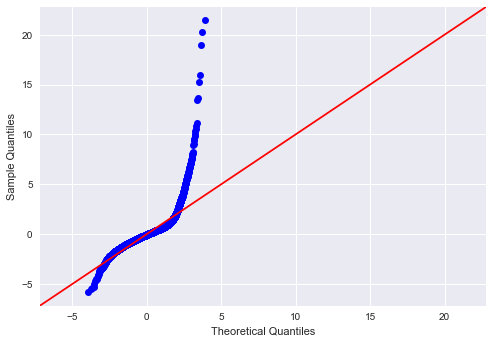

In [25]:
#checking normality by using QQ plots 
import scipy.stats as stats
residuals = model_1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
#Here we can see that our residuals may not be normally distributed and may have extreme values. 
#Therefore, this is linearity violation.

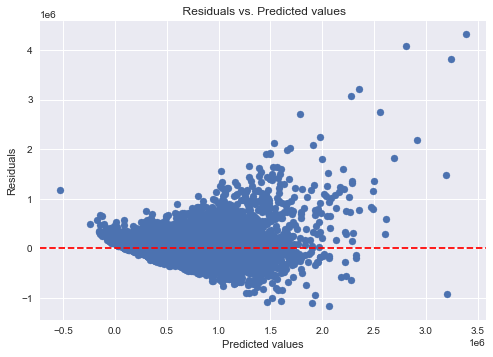

In [26]:
#checking Heteroscedasticity
predicted_values = model_1.predict()
residuals = model_1.resid
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title(' Residuals vs. Predicted values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
# Here we can see that there is heteroscedasticity due to cone shape.

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [28]:
#droping the columns
df2 = df.drop(['id', 'date', 'lat', 'long'], axis=1)

In [29]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


In [30]:
#Remove features/columns that are of no interest for this analysis 
df3 =df2.drop(['grade', 'yr_renovated', 'zipcode'], axis=1)


In [31]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,1180,0.0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,2170,400.0,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,770,0.0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,1050,910.0,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,1680,0.0,1987,1800,7503


In [32]:
#List categorical variables
# As we know above already
categoricals = ['bedrooms', 'bathrooms', 'view', 'floors', 'waterfront', 'condition',]
                                                                               
categoricals

['bedrooms', 'bathrooms', 'view', 'floors', 'waterfront', 'condition']

In [33]:
df3[['bedrooms', 'bathrooms', 'view', 'floors', 'waterfront', 'condition']].nunique()

bedrooms      12
bathrooms     29
view           5
floors         6
waterfront     2
condition      5
dtype: int64

In [34]:
#creating dummy variables
bed_dummies = pd.get_dummies(df3['bedrooms'], prefix='bed', drop_first=True)
bath_dummies = pd.get_dummies(df3['bathrooms'], prefix='bath', drop_first=True)
vw_dummies = pd.get_dummies(df3['view'], prefix='vw', drop_first=True)
flr_dummies = pd.get_dummies(df3['floors'], prefix='flr', drop_first=True)
wtr_dummies = pd.get_dummies(df3['waterfront'], prefix='wtr', drop_first=True)
condi_dummies = pd.get_dummies(df3['condition'], prefix='condi', drop_first=True)


In [35]:
#remove the original columns from our data and add the dummy columns instead
df3 = df3.drop(['bedrooms','bathrooms','view', 'floors', 'waterfront', 'condition'], axis=1)

In [36]:
df3 = pd.concat([df3, bed_dummies, bath_dummies, vw_dummies, flr_dummies, wtr_dummies, condi_dummies, 
               ], axis=1)
df3.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,bed_2,bed_3,...,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,wtr_1.0,condi_2,condi_3,condi_4,condi_5
0,221900.0,1180,5650,1180,0.0,1955,1340,5650,0,1,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,2570,7242,2170,400.0,1951,1690,7639,0,1,...,0,1,0,0,0,0,0,1,0,0
2,180000.0,770,10000,770,0.0,1933,2720,8062,1,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,1960,5000,1050,910.0,1965,1360,5000,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,1680,8080,1680,0.0,1987,1800,7503,0,1,...,0,0,0,0,0,0,0,1,0,0


In [37]:
df3.dtypes

price            float64
sqft_living        int64
sqft_lot           int64
sqft_above         int64
sqft_basement    float64
                  ...   
wtr_1.0            uint8
condi_2            uint8
condi_3            uint8
condi_4            uint8
condi_5            uint8
Length: 61, dtype: object

In [38]:
#checking for multicollinearity
df3.corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,bed_2,bed_3,...,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,wtr_1.0,condi_2,condi_3,condi_4,condi_5
price,1.000000,0.701295,0.088789,0.604424,0.321264,0.051012,0.583792,0.082045,-0.145359,-0.183862,...,0.017046,0.230653,0.122921,0.019312,0.018120,0.264915,-0.049368,0.007687,-0.031812,0.056822
sqft_living,0.701295,1.000000,0.172586,0.876533,0.427998,0.316646,0.756186,0.183837,-0.350934,-0.273623,...,-0.058476,0.418971,0.100617,-0.054622,0.007023,0.104737,-0.061956,0.102863,-0.084702,-0.019476
sqft_lot,0.088789,0.172586,1.000000,0.183210,0.014839,0.052312,0.143805,0.717743,-0.027689,-0.015081,...,0.014637,0.018803,0.004650,-0.043858,-0.005371,0.021429,0.038985,-0.011219,0.012678,-0.014276
sqft_above,0.604424,0.876533,0.183210,1.000000,-0.051707,0.422977,0.731887,0.194445,-0.315647,-0.225849,...,-0.053569,0.577592,0.104879,-0.014612,0.009107,0.071737,-0.055462,0.195638,-0.144233,-0.089393
sqft_basement,0.321264,0.427998,0.014839,-0.051707,1.000000,-0.131664,0.198127,0.015870,-0.136068,-0.142295,...,-0.022008,-0.207494,0.012728,-0.085263,-0.002240,0.083317,-0.025170,-0.147365,0.090479,0.123567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wtr_1.0,0.264915,0.104737,0.021429,0.071737,0.083317,-0.024842,0.083921,0.030653,0.015896,-0.014048,...,0.006267,0.015277,0.005930,0.006313,-0.001498,1.000000,-0.000682,-0.017526,0.009708,0.013695
condi_2,-0.049368,-0.061956,0.038985,-0.055462,-0.025170,-0.065612,-0.050640,0.023457,0.047314,-0.010385,...,0.003271,-0.047711,-0.007597,-0.014933,-0.001578,-0.000682,1.000000,-0.118685,-0.052208,-0.025525
condi_3,0.007687,0.102863,-0.011219,0.195638,-0.147365,0.393772,0.114890,-0.012635,-0.003945,-0.013496,...,-0.125642,0.312049,-0.001673,0.115820,0.007887,-0.017526,-0.118685,1.000000,-0.813095,-0.397520
condi_4,-0.031812,-0.084702,0.012678,-0.144233,0.090479,-0.259393,-0.075547,0.020041,-0.002155,0.026695,...,0.066772,-0.241141,-0.004190,-0.094655,-0.010813,0.009708,-0.052208,-0.813095,1.000000,-0.174865


In [39]:
abs(df3.corr()) > 0.75

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,bed_2,bed_3,...,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,wtr_1.0,condi_2,condi_3,condi_4,condi_5
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wtr_1.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
condi_2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
condi_3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
condi_4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [40]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df4 = df3.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df4['pairs'] = list(zip(df4.level_0, df4.level_1))

df4.set_index(['pairs'], inplace = True)

df4.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df4.columns = ['cc']

df4.drop_duplicates(inplace=True)

df4[(df4.cc>.75) & (df4.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876533
"(condi_3, condi_4)",0.813095
"(sqft_living15, sqft_living)",0.756186


In [41]:
#There are 3 sets of variables are highly correlated.
#So removing 3 variables sqft_above, condi4 and sqft_living15
df3.drop(columns=['sqft_above', 'condi_4', 'sqft_living15'], inplace=True)

In [42]:
df3.head()

,price,sqft_living,sqft_lot,sqft_basement,yr_built,sqft_lot15,bed_2,bed_3,bed_4,bed_5,...,vw_4.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,wtr_1.0,condi_2,condi_3,condi_5
0,221900.0,1180,5650,0.0,1955,5650,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,2570,7242,400.0,1951,7639,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,180000.0,770,10000,0.0,1933,8062,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,604000.0,1960,5000,910.0,1965,5000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,1680,8080,0.0,1987,7503,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
df3.dtypes

price            float64
sqft_living        int64
sqft_lot           int64
sqft_basement    float64
yr_built           int64
sqft_lot15         int64
bed_2              uint8
bed_3              uint8
bed_4              uint8
bed_5              uint8
bed_6              uint8
bed_7              uint8
bed_8              uint8
bed_9              uint8
bed_10             uint8
bed_11             uint8
bed_33             uint8
bath_0.75          uint8
bath_1.0           uint8
bath_1.25          uint8
bath_1.5           uint8
bath_1.75          uint8
bath_2.0           uint8
bath_2.25          uint8
bath_2.5           uint8
bath_2.75          uint8
bath_3.0           uint8
bath_3.25          uint8
bath_3.5           uint8
bath_3.75          uint8
bath_4.0           uint8
bath_4.25          uint8
bath_4.5           uint8
bath_4.75          uint8
bath_5.0           uint8
bath_5.25          uint8
bath_5.5           uint8
bath_5.75          uint8
bath_6.0           uint8
bath_6.25          uint8


In [ ]:
# import necessary libraries
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats

In [44]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """
    Function to perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Parameters:
        X: pandas.Dataframe with candidate features
        y: list-like with the target
        initial_list: list of features to start with (column names of X)
        threshold_in: include a feature if its p-val < threshold_in
        threshold_out: exclude a feature if its p-val > threshold_out
        verbose: whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Note: always set threshold_in < threshold_out to avoid infinite looping
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [45]:
# separate out target and predictors from baseline_df
y = df3['price']
X = df3.drop('price', axis=1)

In [46]:
# perform stepwise selection to select features to be included in baseline
baseline_feats = stepwise_selection(X, y, verbose=True)

Add  sqft_living                    with p-value 0.0
Add  wtr_1.0                        with p-value 0.0
Add  yr_built                       with p-value 1.53377e-292
Add  flr_3.0                        with p-value 1.98783e-100
Add  vw_4.0                         with p-value 3.50153e-79
Add  bed_2                          with p-value 2.96557e-62
Add  bath_7.75                      with p-value 2.37598e-56
Add  bed_3                          with p-value 6.54964e-51
Add  vw_3.0                         with p-value 1.57549e-37
Add  sqft_lot15                     with p-value 1.56875e-31
Add  sqft_basement                  with p-value 7.99021e-31
Add  vw_2.0                         with p-value 9.63023e-28
Add  bath_6.0                       with p-value 4.49069e-28
Add  bath_3.25                      with p-value 2.37712e-26
Add  vw_1.0                         with p-value 2.59014e-25
Add  bath_5.5                       with p-value 1.57782e-20
Add  bath_4.75                      wi

In [47]:
#Run regression with these features
X = df3[baseline_feats]
y = df3['price']
X_with_const = sm.add_constant(X)
baseline_model_2 = sm.OLS(y, X_with_const).fit()
baseline_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     925.4
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:39:37   Log-Likelihood:            -2.9429e+05
No. Observations:               21420   AIC:                         5.887e+05
Df Residuals:                   21380   BIC:                         5.890e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.917e+06   1.34e+05     36.700      0.000    4.65e+06    5.18e+06
sqft_living     278.9550      3.048     91.533      0.000     272.981     284.928
wtr_1.0        5.031e+05   2.29e+04     22.011      0.000    4.58e+05    5.48e+05
yr_built      -2525.0157     68.577    -36.820      0.000   -2659.432   -2390.599
flr_3.0          1.7e+05   1.01e+04     16.835      0.000     1.5e+05     1.9e+05
vw_4.0         3.237e+05   1.59e+04     20.326      0.000    2.93e+05    3.55e+05
bed_2          5.482e+04   5067.862     10.817      0.000    4.49e+04    6.48e+04
bath_7.75      4.182e+06   2.26e+05     18.494      0.000    3.74e+06    4.63e+06
vw_3.0         1.555e+05   1.04e+04     14.911      0.000    1.35e+05    1.76e+05
sqft_lot15       -0.7143      0.058    -12.250      0.000      -0.829      -0.600
sqft_basement   -39.2419      4.613     -8.507      0.000     -48.284     -30.200
vw_2.0         8.589e+04   7613.213     11.281      0.000     7.1e+04    1.01e+05
bath_6.0       1.273e+06   9.23e+04     13.787      0.000    1.09e+06    1.45e+06
bath_3.25       1.57e+05   9935.047     15.798      0.000    1.37e+05    1.76e+05
vw_1.0         1.358e+05   1.26e+04     10.774      0.000    1.11e+05    1.61e+05
bath_5.5       8.912e+05    7.2e+04     12.377      0.000     7.5e+05    1.03e+06
bath_4.75      5.997e+05   4.77e+04     12.581      0.000    5.06e+05    6.93e+05
bath_3.75      2.485e+05   1.86e+04     13.347      0.000    2.12e+05    2.85e+05
bath_4.25      3.329e+05   2.61e+04     12.772      0.000    2.82e+05    3.84e+05
bath_4.0       2.555e+05   2.02e+04     12.672      0.000    2.16e+05    2.95e+05
bath_3.5       1.101e+05   9168.778     12.013      0.000    9.22e+04    1.28e+05
flr_2.5        1.747e+05   1.82e+04      9.585      0.000    1.39e+05     2.1e+05
condi_5        4.599e+04   5916.193      7.773      0.000    3.44e+04    5.76e+04
bath_5.0       4.668e+05   4.96e+04      9.412      0.000     3.7e+05    5.64e+05
bed_6          -1.97e+05   1.47e+04    -13.441      0.000   -2.26e+05   -1.68e+05
bath_5.25      5.763e+05   6.35e+04      9.069      0.000    4.52e+05    7.01e+05
bath_8.0       1.539e+06   1.63e+05      9.469      0.000    1.22e+06    1.86e+06
bath_4.5       2.302e+05   2.36e+04      9.747      0.000    1.84e+05    2.76e+05
bed_7         -3.672e+05   3.73e+04     -9.836      0.000    -4.4e+05   -2.94e+05
flr_2.0        2.872e+04   4568.769      6.286      0.000    1.98e+04    3.77e+04
bath_5.75      7.198e+05   1.13e+05      6.354      0.000    4.98e+05    9.42e+05
bed_5         -8.452e+04   6749.604    -12.522      0.000   -9.78e+04   -7.13e+04
bath_6.25       8.37e+05    1.6e+05      5.244      0.000    5.24e+05    1.15e+06
bath_2.25      2.835e+04   5358.329      5.290      0.000    1.78e+04    3.88e+04
bath_3.0        4.02e+04   8677.625      4.633   

In [ ]:
#Here we can see that adjusted R-squared is 0.627 and different cofficeints for each features.
#Now we need to check Normality and Homoscedasticity.

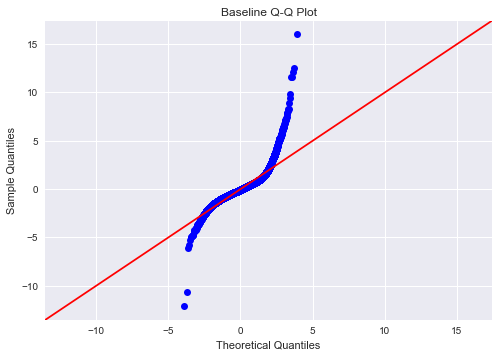

In [48]:
#Q-Q plot - used to check the normality of residuals 
#Normally distributed residuals will display along the 45 degree red line
#checking Normality
# produce baseline q-q plot
ax = sm.graphics.qqplot(baseline_model_2.resid, dist=stats.norm, line='45', fit=True)
plt.title('Baseline Q-Q Plot')
plt.show()

In [ ]:
#Here we can see that our residuals may not be normally distributed and may have extreme values. 
#Therefore, this is linearity violation.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


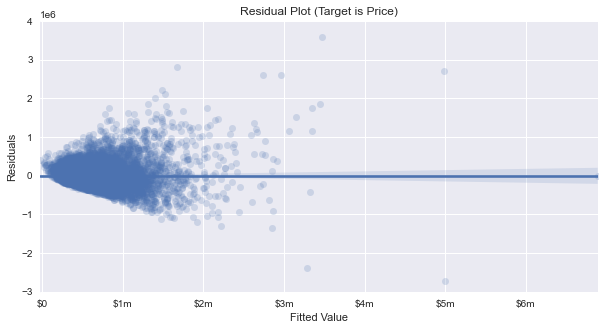

In [50]:
#Checking Homoscedasticity
# generate model predictions
baseline_preds = baseline_model_2.predict(X_with_const)

# plot predicted vals vs. model residuals
plt.figure(figsize=(10, 5))
ax = sns.regplot(x=baseline_preds, y=baseline_model_2.resid, scatter_kws={'alpha': 0.2})

# add title and axes labels
plt.title('Residual Plot (Target is Price)')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')

# rework ticks to enhance readability
xticks = np.linspace(0, 6*10**6, 7)
xticks_labels = ['$0', '$1m', '$2m', '$3m', '$4m', '$5m', '$6m']
yticks = np.linspace(-3*10**6, 4*10**6, 8)
ax.set(xticks=xticks, xticklabels=xticks_labels, yticks=yticks)

# display
plt.show()

In [ ]:
#Looking at the plot of predicted values vs. residuals above, there is a clear pattern visible. 
#As predicted values increase, the variance of residuals increases, 
#indicated by the spreading of points as the graph moves to the right. 
#This indicates the presence of heteroscedasticity. 
#We have identified another assumption required for linear assumption being violated.

In [51]:
df3.head()

,price,sqft_living,sqft_lot,sqft_basement,yr_built,sqft_lot15,bed_2,bed_3,bed_4,bed_5,...,vw_4.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,wtr_1.0,condi_2,condi_3,condi_5
0,221900.0,1180,5650,0.0,1955,5650,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,2570,7242,400.0,1951,7639,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,180000.0,770,10000,0.0,1933,8062,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,604000.0,1960,5000,910.0,1965,5000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,1680,8080,0.0,1987,7503,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
#import necessary libraries for regression analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('bmh')

from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm


import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [53]:
 #Also variables which are not needed for analysis can be removed. 
df3.drop(columns=[ 'sqft_basement', 'yr_built', 'sqft_lot15'], inplace=True)

In [54]:
df3.head()

,price,sqft_living,sqft_lot,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,...,vw_4.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,wtr_1.0,condi_2,condi_3,condi_5
0,221900.0,1180,5650,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,2570,7242,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,180000.0,770,10000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,604000.0,1960,5000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,1680,8080,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


/Users/bidurshrestha/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bidurshrestha/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bidurshrestha/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

(0.0, 10000.0)

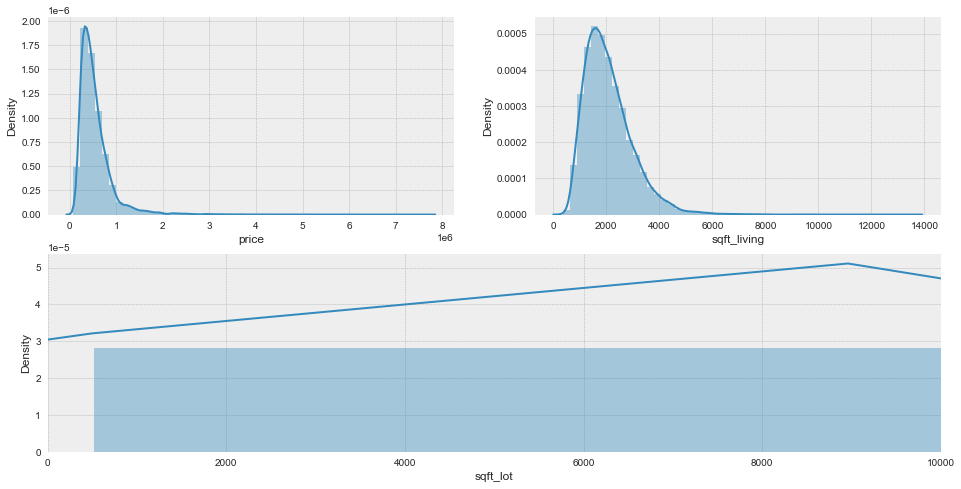

In [55]:
#log Transformation
#Exploring distributions of continuous variables
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(df3.price, label='Prices')
plt.subplot(222)
sns.distplot(df3.sqft_living, label='Sqft Living')
plt.subplot(212)
sns.distplot(df3.sqft_lot, label='Sqft Lot')
plt.xlim(0, 10000)


In [ ]:
#Our continuous variables currently don't follow a normal distribution. 
#Sqft_living seems pretty skewed, so logging it might improve our heteroscedasticity.

In [56]:
# Convert to logs
price = np.log(df3.price)
sqft_living = np.log(df3.sqft_living)
sqft_lot = np.log(df3.sqft_lot)


/Users/bidurshrestha/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bidurshrestha/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bidurshrestha/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

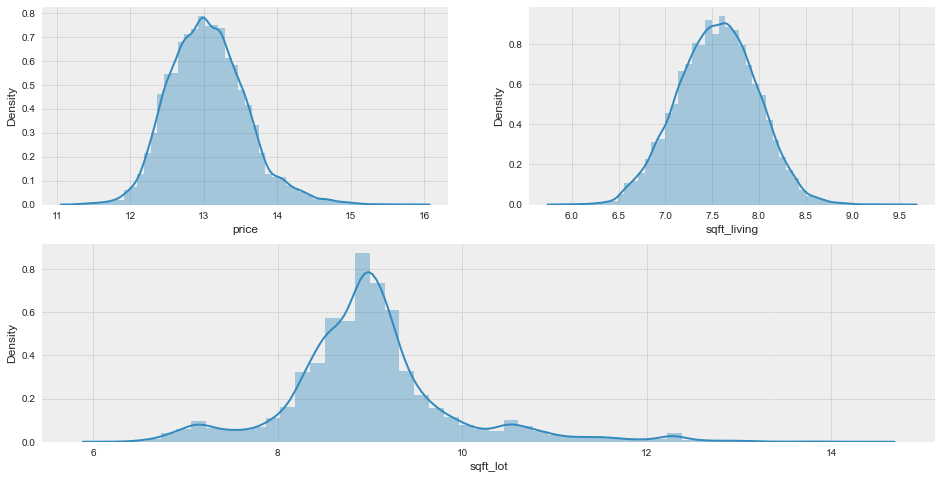

In [57]:
#Comparing the distributions
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(price, label='Prices')
plt.subplot(222)
sns.distplot(sqft_living, label='Sqft Living')
plt.subplot(212)
sns.distplot(sqft_lot, label='Sqft Lot')

In [ ]:
# Here we can see that price, sqft_living and sqft_lot are normally distributed.

In [58]:
#Apply log transformations

df3['price'] = price
df3['sqft_living'] = sqft_living
df3['sqft_lot'] = sqft_lot


In [59]:
df3.head()

,price,sqft_living,sqft_lot,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,...,vw_4.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,wtr_1.0,condi_2,condi_3,condi_5
0,12.309982,7.073270,8.639411,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,13.195614,7.851661,8.887653,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,12.100712,6.646391,9.210340,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,13.311329,7.580700,8.517193,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.142166,7.426549,8.997147,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """
    Function to perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Parameters:
        X: pandas.Dataframe with candidate features
        y: list-like with the target
        initial_list: list of features to start with (column names of X)
        threshold_in: include a feature if its p-val < threshold_in
        threshold_out: exclude a feature if its p-val > threshold_out
        verbose: whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Note: always set threshold_in < threshold_out to avoid infinite looping
    """
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [61]:
# separate out target and predictors from baseline_df
y = df3['price']
X = df3.drop('price', axis=1)

In [62]:
# perform stepwise selection to select features to be included in baseline
baseline_feats = stepwise_selection(X, y, verbose=True)

Add  sqft_living                    with p-value 0.0
Add  vw_4.0                         with p-value 1.459e-160
Add  bed_2                          with p-value 2.0492e-128
Add  sqft_lot                       with p-value 5.04051e-69
Add  bath_2.5                       with p-value 1.179e-68
Add  vw_3.0                         with p-value 1.30015e-58
Add  vw_2.0                         with p-value 2.50861e-61
Add  condi_5                        with p-value 1.14908e-38
Add  vw_1.0                         with p-value 3.95694e-32
Add  flr_1.5                        with p-value 2.56088e-32
Add  flr_3.0                        with p-value 1.56915e-31
Add  wtr_1.0                        with p-value 4.44454e-21
Add  bath_3.25                      with p-value 3.73003e-17
Add  flr_2.5                        with p-value 8.70443e-16
Add  flr_2.0                        with p-value 8.38296e-15
Add  bath_3.75                      with p-value 3.85448e-13
Add  bath_4.0                      

In [63]:
#Creating model after log transformation 
#Run regression with these features
X = df3[baseline_feats]
y = df3['price']
X_with_const = sm.add_constant(X)
baseline_model_3 = sm.OLS(y, X_with_const).fit()
baseline_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     716.8
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:41:41   Log-Likelihood:                -8065.9
No. Observations:               21420   AIC:                         1.621e+04
Df Residuals:                   21383   BIC:                         1.650e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9620      0.073     95.413      0.000       6.819       7.105
sqft_living     0.8889      0.011     84.602      0.000       0.868       0.910
vw_4.0          0.4188      0.025     16.831      0.000       0.370       0.468
sqft_lot       -0.0460      0.003    -14.524      0.000      -0.052      -0.040
bath_2.5       -0.0477      0.007     -6.984      0.000      -0.061      -0.034
vw_3.0          0.2499      0.016     15.372      0.000       0.218       0.282
vw_2.0          0.1867      0.012     15.697      0.000       0.163       0.210
condi_5         0.0949      0.010      9.638      0.000       0.076       0.114
vw_1.0          0.2373      0.020     12.004      0.000       0.199       0.276
flr_1.5         0.1348      0.009     14.966      0.000       0.117       0.153
flr_3.0         0.1945      0.016     12.038      0.000       0.163       0.226
wtr_1.0         0.3141      0.036      8.740      0.000       0.244       0.385
bath_3.25       0.1706      0.016     10.786      0.000       0.140       0.202
flr_2.5         0.2383      0.029      8.326      0.000       0.182       0.294
flr_2.0         0.0401      0.007      5.827      0.000       0.027       0.054
bath_3.75       0.2780      0.029      9.496      0.000       0.221       0.335
bath_4.0        0.2719      0.032      8.609      0.000       0.210       0.334
bath_3.5        0.1337      0.015      9.095      0.000       0.105       0.162
condi_3        -0.0498      0.006     -8.418      0.000      -0.061      -0.038
bath_4.25       0.2942      0.041      7.220      0.000       0.214       0.374
condi_2        -0.1903      0.028     -6.734      0.000      -0.246      -0.135
bath_1.0        0.0378      0.008      4.600      0.000       0.022       0.054
bed_3          -0.2583      0.026     -9.859      0.000      -0.310      -0.207
bath_4.75       0.4215      0.075      5.654      0.000       0.275       0.568
bath_4.5        0.2112      0.037      5.722      0.000       0.139       0.284
bed_6          -0.4312      0.035    -12.312      0.000      -0.500      -0.363
bath_5.5        0.5390      0.112      4.798      0.000       0.319       0.759
bed_5          -0.3443      0.029    -12.078      0.000      -0.400      -0.288
bed_4          -0.2980      0.027    -11.030      0.000      -0.351      -0.245
bed_7          -0.5171      0.064     -8.087      0.000      -0.642      -0.392
bath_6.0        0.6600      0.146      4.532      0.000       0.375       0.945
bath_5.25       0.3566      0.098      3.621      0.000       0.164       0.550
bath_5.0        0.2864      0.078      3.676      0.000       0.134       0.439
bath_7.75       1.1043      0.355      3.114      0.002       0.409       1.799
bed_8          -0.3667      0.103     -3.572      0.000      -0.568      -0.165
bed_2          -0.0829      0.026     -3.15

In [ ]:
# Adjusted R-squared value is 0.564 and all p-values look great.
#Now need to check normality and Homoscedasticity after log transformation

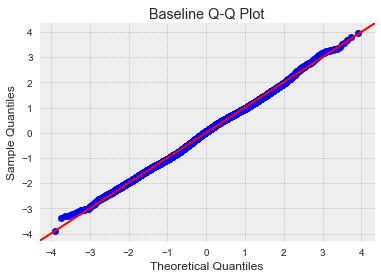

In [64]:
#Q-Q plot - used to check the normality of residuals 
#Normally distributed residuals will display along the 45 degree red line
#Checking Normality
#Produce baseline q-q plot
ax = sm.graphics.qqplot(baseline_model_3.resid, dist=stats.norm, line='45', fit=True)
plt.title('Baseline Q-Q Plot')
plt.show()

In [ ]:
#Looking at our q-q plot, 
#we see that the residuals are nearly perfectly normally distributed. 
#Still fairly straight, especially when compared with the baseline. 
#Will allow this to pass normality assumption for now.

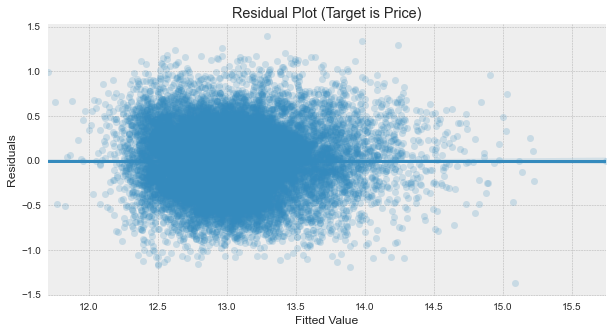

In [65]:
#Checking Homoscedasticity
#Generate model predictions
baseline_preds = baseline_model_3.predict(X_with_const)

# plot predicted vals vs. model residuals
plt.figure(figsize=(10, 5))
ax = sns.regplot(x=baseline_preds, y=baseline_model_3.resid, scatter_kws={'alpha': 0.2})

# add title and axes labels
plt.title('Residual Plot (Target is Price)')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')

# display
plt.show()

In [ ]:
#No clear pattern in residual plots, helps support the fact that homoscedasticity assumptions hold.

In [ ]:
#Evaluation
#Now that three model iterations have been completed, 
#the best performer can be selected and further evaluated. 
#Model 3 was the best performer, given the fact that adjusted r-squared score is okay.
#while also meeting requirements and assumptions for linear regression.

In [66]:
# select best model
best_identified = baseline_model_3
best_identified.summary()

# identify corresponding df
final_df = df3.copy()

In [67]:
# import necessary libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# separate out target from predictors
y = final_df['price']
X = final_df.drop('price', axis=1)

# perform cross-validation on r-squared to validate results
reg = LinearRegression()
cross_val = KFold(n_splits=5, shuffle=True, random_state=23)
score = cross_val_score(reg, X, y, scoring='r2', cv=cross_val)
print(score)
print(score.mean())


[0.5416356  0.5382643  0.54490484 0.54465508 0.54864126]
0.5436202151772085


In [ ]:
#Using cross-validation with 5 folds, we see an average r-squared value of 54.4%. 
#Next, we will examine the coefficients.

In [68]:
# print coefficients
coef = best_identified.params
coef


const          6.961964
sqft_living    0.888941
vw_4.0         0.418786
sqft_lot      -0.045982
bath_2.5      -0.047696
vw_3.0         0.249947
vw_2.0         0.186693
condi_5        0.094913
vw_1.0         0.237338
flr_1.5        0.134847
flr_3.0        0.194468
wtr_1.0        0.314082
bath_3.25      0.170597
flr_2.5        0.238275
flr_2.0        0.040055
bath_3.75      0.277964
bath_4.0       0.271932
bath_3.5       0.133673
condi_3       -0.049839
bath_4.25      0.294165
condi_2       -0.190318
bath_1.0       0.037778
bed_3         -0.258340
bath_4.75      0.421536
bath_4.5       0.211202
bed_6         -0.431184
bath_5.5       0.539010
bed_5         -0.344349
bed_4         -0.297970
bed_7         -0.517137
bath_6.0       0.660008
bath_5.25      0.356648
bath_5.0       0.286400
bath_7.75      1.104267
bed_8         -0.366712
bed_2         -0.082867
bed_9         -0.427121
dtype: float64

In [69]:
# reverse log transform to be able to interpret coefficients
scaled_coef = 10**coef
scaled_coef

const          9.161436e+06
sqft_living    7.743567e+00
vw_4.0         2.622928e+00
sqft_lot       8.995350e-01
bath_2.5       8.959907e-01
vw_3.0         1.778063e+00
vw_2.0         1.537069e+00
condi_5        1.244264e+00
vw_1.0         1.727183e+00
flr_1.5        1.364103e+00
flr_3.0        1.564832e+00
wtr_1.0        2.061021e+00
bath_3.25      1.481144e+00
flr_2.5        1.730911e+00
flr_2.0        1.096618e+00
bath_3.75      1.896549e+00
bath_4.0       1.870388e+00
bath_3.5       1.360419e+00
condi_3        8.915821e-01
bath_4.25      1.968635e+00
condi_2        6.451812e-01
bath_1.0       1.090883e+00
bed_3          5.516449e-01
bath_4.75      2.639586e+00
bath_4.5       1.626307e+00
bed_6          3.705233e-01
bath_5.5       3.459470e+00
bed_5          4.525339e-01
bed_4          5.035353e-01
bed_7          3.039927e-01
bath_6.0       4.570969e+00
bath_5.25      2.273255e+00
bath_5.0       1.933748e+00
bath_7.75      1.271356e+01
bed_8          4.298215e-01
bed_2          8.262

In [70]:
from sklearn.model_selection import cross_validate

In [71]:
#multiple different metrics at once (e.g. R-Squared and negative MSE)
cross_validate(reg, X, y, scoring=["r2", "neg_mean_squared_error"], cv=cross_val)

{'fit_time': array([0.09159994, 0.06776118, 0.06888604, 0.06690884, 0.06792617]),
 'score_time': array([0.00191617, 0.00131583, 0.0011642 , 0.00108218, 0.0010829 ]),
 'test_r2': array([0.5416356 , 0.5382643 , 0.54490484, 0.54465508, 0.54864126]),
 'test_neg_mean_squared_error': array([-0.12494102, -0.12810766, -0.12706034, -0.12342945, -0.12253141])}

In [72]:
#comparing the train vs. test scores (e.g. to look for overfitting)
cross_validate(reg, X, y, return_train_score=True, cv=cross_val)

{'fit_time': array([0.08329391, 0.06783104, 0.06433225, 0.06685901, 0.07181907]),
 'score_time': array([0.00156498, 0.00153494, 0.00095201, 0.00095296, 0.00093079]),
 'test_score': array([0.5416356 , 0.5382643 , 0.54490484, 0.54465508, 0.54864126]),
 'train_score': array([0.54898737, 0.54934722, 0.54755919, 0.54785375, 0.54735853])}

In [ ]:
#Here we can see that there is not much differnce between test_score and train_score. 
#So model is not overfitting

In [73]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [74]:
#Finding train and test mean square error
cv_results = cross_validate(reg, X, y, scoring=["neg_mean_squared_error"], return_train_score=True, cv=cross_val)
train_mse_scores= -cv_results['train_neg_mean_squared_error']
test_mse_scores= -cv_results['test_neg_mean_squared_error']
mean_train_mse = np.mean(train_mse_scores)
mean_test_mse = np.mean(test_mse_scores)
print("Mean Train Mean Squared Error:", mean_train_mse)
print("Mean Test Mean Squared Error:", mean_test_mse)

Mean Train Mean Squared Error: 0.12395754871514883
Mean Test Mean Squared Error: 0.1252139756188902


In [ ]:
#Here we can see that there is not much differnce between 
#Mean Train Mean Squared Erorr and Mean Test Mean Squared Erorr
#So model is not overfitting

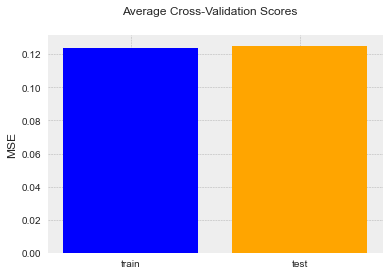

In [75]:
#Reproting the Cross validation
cross_val_results = cross_validate(reg, X, y, scoring="neg_mean_squared_error", return_train_score=True, cv=cross_val)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()
labels = ['train', 'test']
fig, ax = plt.subplots()
ax.bar(labels, [train_avg, test_avg], color= ['blue', 'orange'])
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

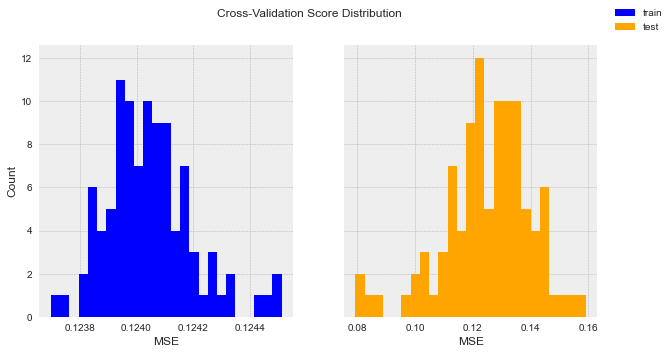

In [76]:
#checking the distribution of the train vs. test scores using a histogram or a box plot
cross_val_results = cross_validate(reg, X, y, cv=100, scoring="neg_mean_squared_error", return_train_score=True)
train_scores = -cross_val_results["train_score"]
test_scores = -cross_val_results["test_score"]

fig, (left, right) = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
bins=25
left.hist(train_scores, label=labels[0], bins=bins, color= ['blue'])
left.set_ylabel("Count")
left.set_xlabel("MSE")
right.hist(test_scores, label=labels[1], bins=bins, color=['orange'])
right.set_xlabel("MSE")
fig.suptitle("Cross-Validation Score Distribution")
fig.legend();

In [ ]:
#Here we can see that both train and test have normal cross validation distribution.

In [ ]:
#Final Results
#After observing the model_3, and doing model evalution and cross validation
#Adjusted R squared value is 0.546 which indicates that 54.6% of variance in the dependent variable(price) is 
#explained by independent variables(features).
#Similarly coefficient of vw_4.0 is 0.418786 which is dummy variable of view. 
#It indicates that properties that have been viewed tend to have a higher value in the target variable 
#compared to those haven't viewed.
#Similarly coefficient of bath_7.75 is 1.1043 which is dummy variable of bathroom.
#It indicates that on average, for every additional bathroom a property has, the target variable(price) 
#is expected to increase by approximately 1.1043 units.
#Similarly coefficient ofwtr_1.0 is 0.314082. It indicates that having a view to a waterfront positively influences 
#the price of the property.